# คุณภาพเรดาร์จาก MFB
* ใช้ percentile

C:\Users\Admin\AppData\Local\Temp\ipykernel_24868\2532209735.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['mfb_quality'] = df_filtered['MFB'].apply(lambda x: classify_mfb_percentile(x, mfb_percentiles))
C:\Users\Admin\AppData\Local\Temp\ipykernel_24868\2532209735.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['corr_quality'] = df_filtered['Correlation'].apply(lambda x: classify_corr_percentile(x, corr_percentiles))
C:\Users\Admin\AppData\Local\Temp\ipykernel_24868\25322

Percentile-based radar quality maps have been saved as 'percentile_based_radar_quality_maps.png'
MFB Percentiles: (0.3791476160059498, 0.9007611905148198, 1.3832042363127128, 1.674233415579064)
Correlation Percentiles: (0.41141528960412194, 0.6193993238967839, 0.7235386875934491, 0.8080441136572185)


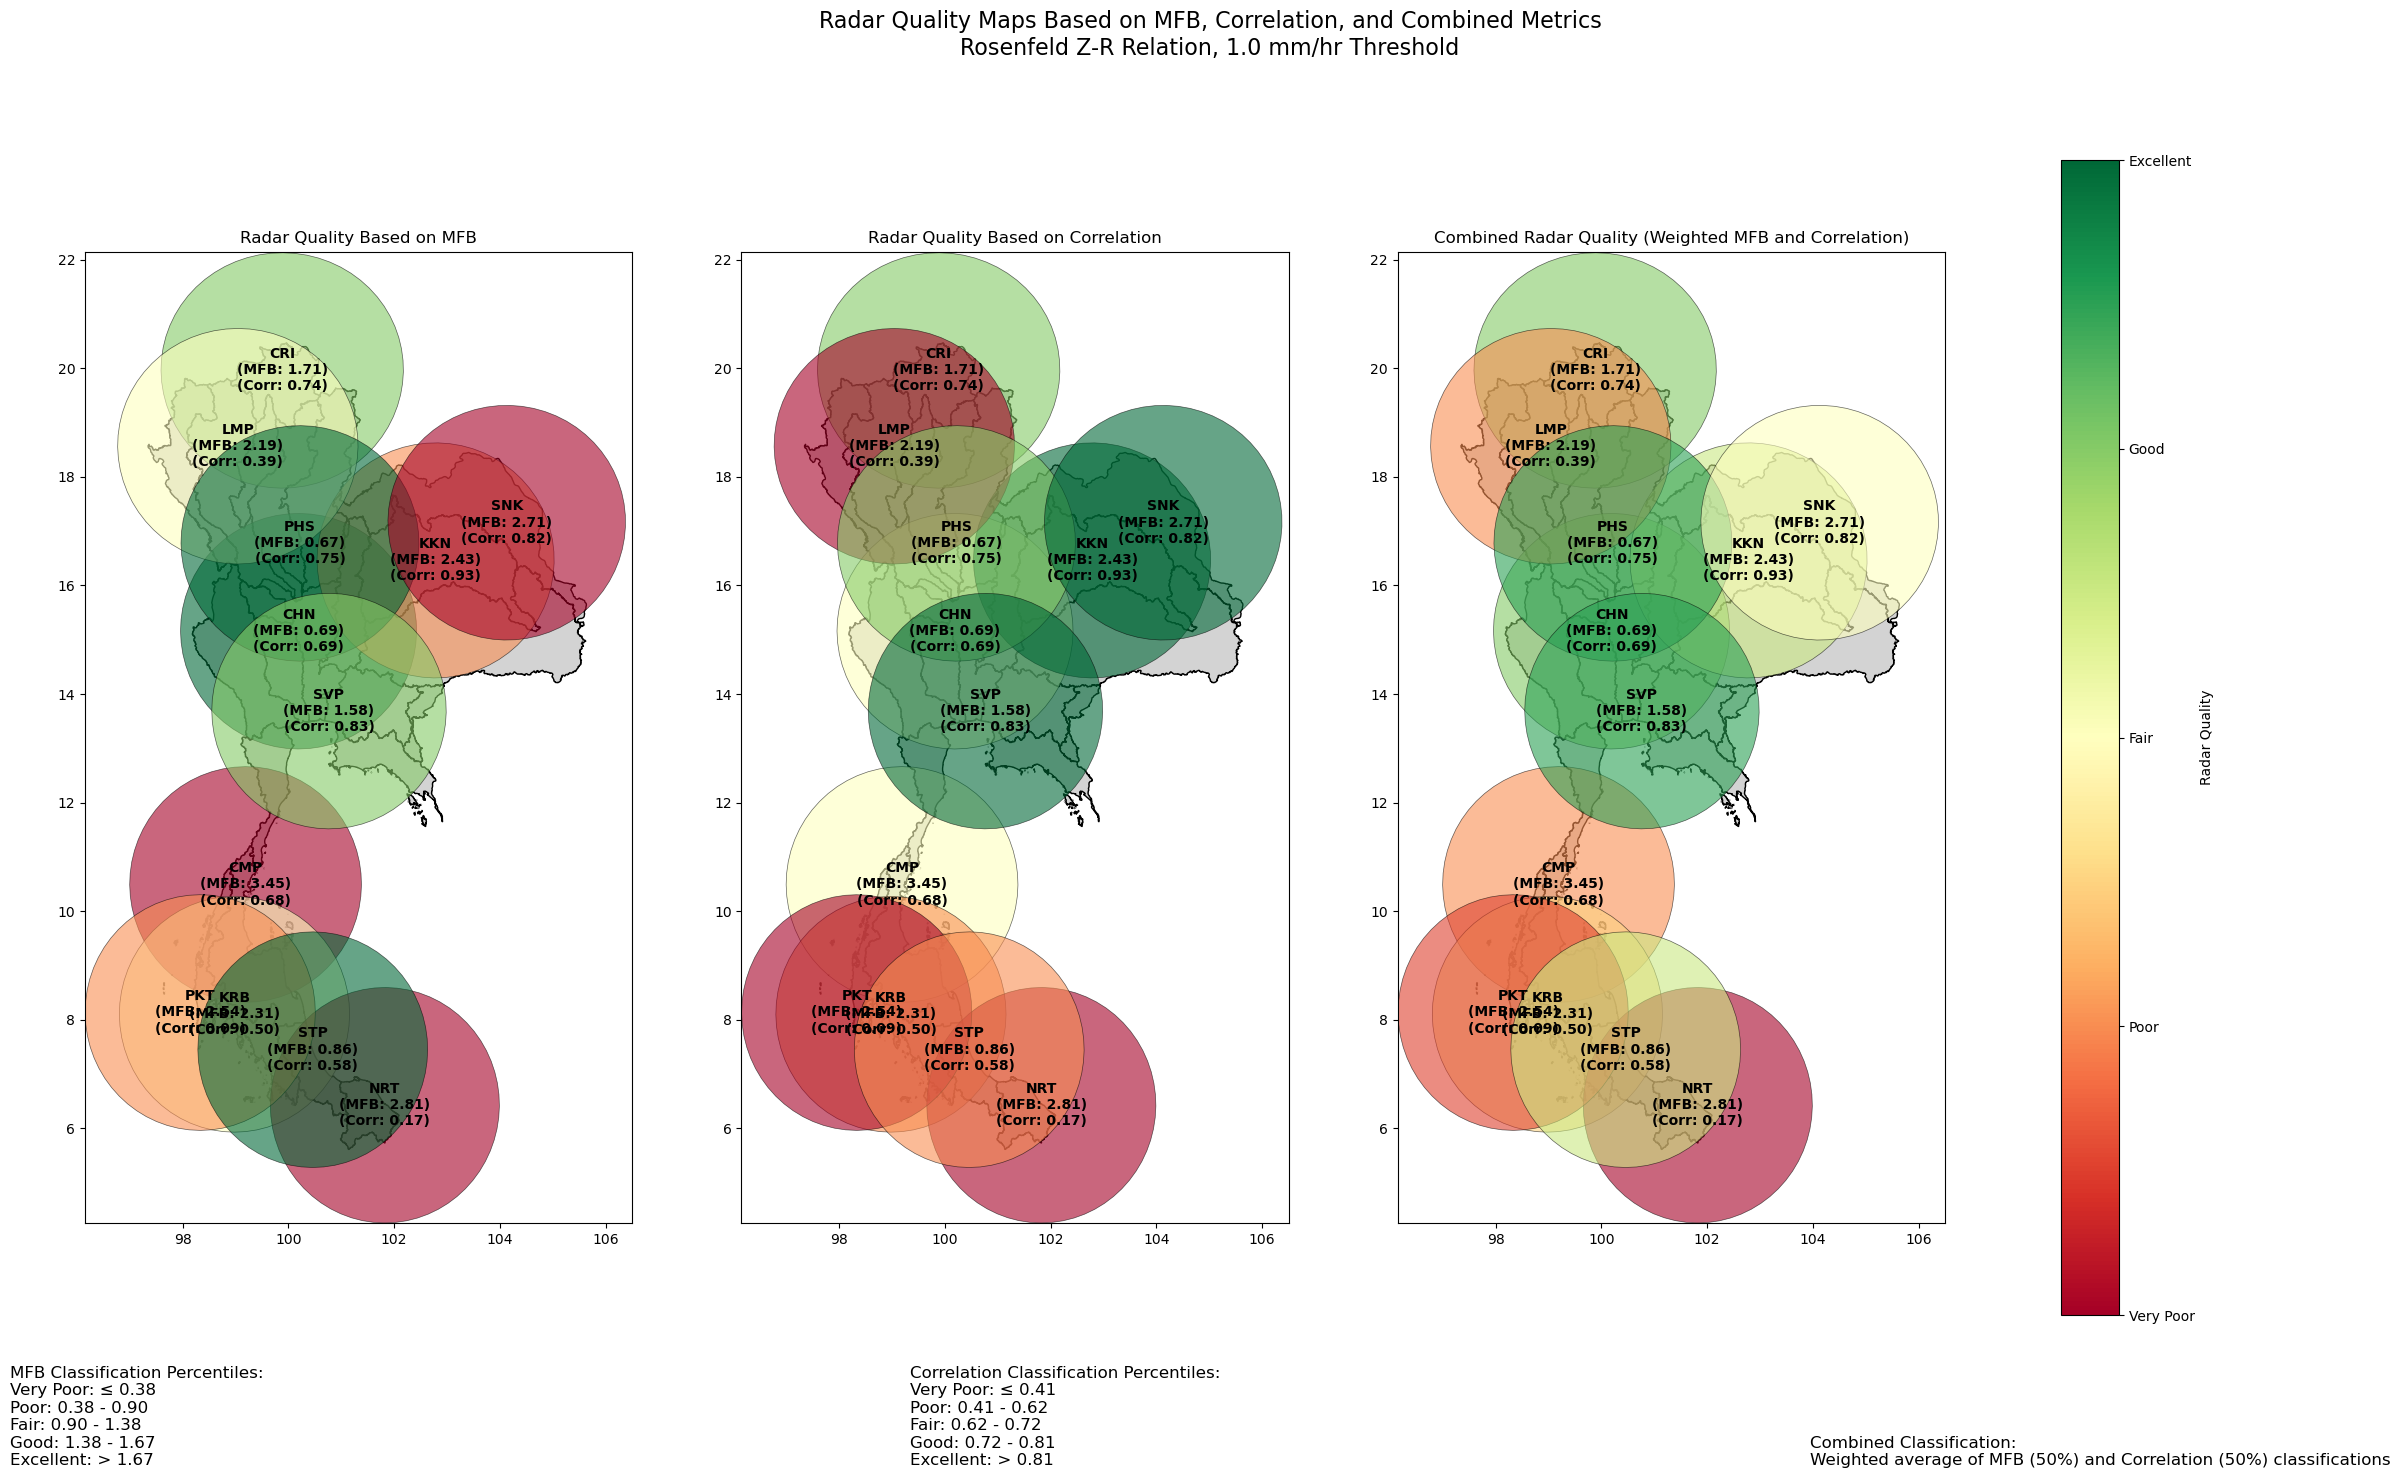

In [21]:
'''
2024.09.22
โค้ดนี้พัฒนาโดย รองศาสตราจารย์ ดร. นัฐพล มหาวิค ภาควิชาทรัพยากรธรรมชาติและสิ่งแวดล้อม คณะเกษตรศาสตร์ฯ มหาวิทยาลัยนเรศวร 
ในงานวิจัย เรื่อง "การวิจัยและพัฒนาผลิตภัณฑ์โมเสคฝนประมาณค่าจากเรดาร์ตรวจอากาศในพื้นที่ระดับลุ่มน้ำของประเทศไทยด้วยเทคโนโลยีภูมิสารสนเทศรหัสเปิด"
สนับสนุนทุนวิจัยโดยสํานักงานการวิจัยแห่งชาติ (วช.)  แผนงานการวิจัยและนวัตกรรมแผนงานด้านการบริหารจัดการภัยพิบัติทางธรรมชาติ 
ประจำปีงบประมาณ 2566  ตามสัญญา เลขที่ N25A660467 ผู้นำโค้ดนี้ไปใช้หรือดัดแปลงควรอ้างอิงงานวิจัยชิ้นนี้ตามหลักเกณฑ์การอ้างอิงสากล
เรียนหลักการเรดาร์และภูมิสารสนเทศ ที่ https://www.youtube.com/@Nattapon_Mahavik/playlists
หนังสือเรดาร์ตรวจอากาศทางอุตุนิยมวิทยา สำนักพิมพ์จุฬาฯ : https://www.chulabook.com/education/144567
หนังสือออนไลน์เรดาร์ตรวจอากาศทางอุตุนิยมวิทยา สำนักพิมพ์จุฬาฯ : https://www.chulabook.com/education/205129
ติดต่อ nattaponm@nu.ac.th
'''

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np

# Function to calculate MFB deviation from 1.0
def calculate_mfb_deviation(mfb):
    return abs(mfb - 1.0)

# Function to calculate percentiles for MFB classification
def calculate_mfb_percentiles(mfb_values):
    deviations = [calculate_mfb_deviation(mfb) for mfb in mfb_values]
    p20, p40, p60, p80 = np.percentile(deviations, [20, 40, 60, 80])
    return p20, p40, p60, p80

# Function to classify MFB based on deviation percentiles
def classify_mfb_percentile(mfb, percentiles):
    deviation = calculate_mfb_deviation(mfb)
    p20, p40, p60, p80 = percentiles
    if deviation <= p20:
        return 5  # Excellent
    elif p20 < deviation <= p40:
        return 4  # Good
    elif p40 < deviation <= p60:
        return 3  # Fair
    elif p60 < deviation <= p80:
        return 2  # Poor
    else:
        return 1  # Very Poor

# Function to calculate percentiles for correlation classification (unchanged)
def calculate_corr_percentiles(corr_values):
    p20, p40, p60, p80 = np.percentile(corr_values, [20, 40, 60, 80])
    return p20, p40, p60, p80

# Function to classify correlation based on percentiles (unchanged)
def classify_corr_percentile(corr, percentiles):
    p20, p40, p60, p80 = percentiles
    if corr >= p80:
        return 5  # Excellent
    elif p60 <= corr < p80:
        return 4  # Good
    elif p40 <= corr < p60:
        return 3  # Fair
    elif p20 <= corr < p40:
        return 2  # Poor
    else:
        return 1  # Very Poor

# Main execution
if __name__ == "__main__":
    # Read the CSV file
    df = pd.read_csv('./0Zprocessing_data/0analysis_results/combined_results_threshold_1.0.csv')

    # Filter for Rosenfeld Z-R relation and 1.0 threshold
    df_filtered = df[(df['ZR_Relation'] == 'rosenfeld-tropical') & (df['Threshold'] == 1.0)]

    # Calculate percentiles
    mfb_percentiles = calculate_mfb_percentiles(df_filtered['MFB'])
    corr_percentiles = calculate_corr_percentiles(df_filtered['Correlation'])

    # Apply classifications
    df_filtered['mfb_quality'] = df_filtered['MFB'].apply(lambda x: classify_mfb_percentile(x, mfb_percentiles))
    df_filtered['corr_quality'] = df_filtered['Correlation'].apply(lambda x: classify_corr_percentile(x, corr_percentiles))

    # Combined quality (weighted average)
    df_filtered['combined_quality'] = 0.5 * df_filtered['mfb_quality'] + 0.5 * df_filtered['corr_quality']

    # Dictionary of radar coordinates
    radar_coords = {
        "CHN": (100.191263, 15.157852),
        "CMP": (99.188203, 10.493099),
        "CRI": (99.881593, 19.961471),
        "KKN": (102.785881, 16.4625),
        "KRB": (98.97806, 8.101389),
        "LMP": (99.041701, 18.565399),
        "NRT": (101.825165, 6.426888),
        "PHS": (100.217964, 16.775408),
        "PKT": (98.329444, 8.133611),
        "SNK": (104.132591, 17.156363),
        "STP": (100.459996, 7.449996),
        "SVP": (100.7675, 13.686389)
    }

    # Create GeoDataFrame
    gdf = gpd.GeoDataFrame(
        df_filtered,
        geometry=[Point(radar_coords[radar]) for radar in df_filtered['Radar']],
        crs="EPSG:4326"
    )

    # Create buffers (240 km) for each radar station
    gdf_utm = gdf.to_crs("EPSG:32647")  # UTM47N
    buffers = gdf_utm.buffer(240000)  # 240 km in meters
    gdf['geometry'] = buffers.to_crs("EPSG:4326")

    # Read the Thailand shapefile
    thailand = gpd.read_file('../1data/1GIS/0base_map_gis/MainBasin_ONWR_Law_WGS84Geo.shp')

    # Define color map
    cmap = plt.cm.RdYlGn  # Red-Yellow-Green color map
    norm = plt.Normalize(vmin=1, vmax=5)

    # Create the plot with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 15))

    # Plot MFB Quality
    thailand.plot(ax=ax1, color='lightgrey', edgecolor='black')
    gdf.plot(ax=ax1, column='mfb_quality', cmap=cmap, norm=norm, alpha=0.6, edgecolor='black', linewidth=0.5)
    ax1.set_title("Radar Quality Based on MFB")

    # Plot Correlation Quality
    thailand.plot(ax=ax2, color='lightgrey', edgecolor='black')
    gdf.plot(ax=ax2, column='corr_quality', cmap=cmap, norm=norm, alpha=0.6, edgecolor='black', linewidth=0.5)
    ax2.set_title("Radar Quality Based on Correlation")

    # Plot Combined Quality
    thailand.plot(ax=ax3, color='lightgrey', edgecolor='black')
    gdf.plot(ax=ax3, column='combined_quality', cmap=cmap, norm=norm, alpha=0.6, edgecolor='black', linewidth=0.5)
    ax3.set_title("Combined Radar Quality (Weighted MFB and Correlation)")

    # Set plot limits for all subplots
    for ax in [ax1, ax2, ax3]:
        ax.set_xlim(96.15, 106.5)
        ax.set_ylim(4.25, 22.15)

    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=[ax1, ax2, ax3], label='Radar Quality', ticks=[1, 2, 3, 4, 5])
    cbar.ax.set_yticklabels(['Very Poor', 'Poor', 'Fair', 'Good', 'Excellent'])

    # Annotate radar stations
    for ax in [ax1, ax2, ax3]:
        for idx, row in gdf.iterrows():
            ax.annotate(f"{row['Radar']}\n(MFB: {row['MFB']:.2f})\n(Corr: {row['Correlation']:.2f})", 
                        xy=row.geometry.centroid.coords[0], 
                        ha='center', va='center', fontweight='bold', fontsize=10)

    plt.suptitle("Radar Quality Maps Based on MFB, Correlation, and Combined Metrics\nRosenfeld Z-R Relation, 1.0 mm/hr Threshold", fontsize=16)

    # Add explanation
    plt.figtext(0.1, 0.01, f"MFB Classification Percentiles:\n"
                           f"Very Poor: ≤ {mfb_percentiles[0]:.2f}\n"
                           f"Poor: {mfb_percentiles[0]:.2f} - {mfb_percentiles[1]:.2f}\n"
                           f"Fair: {mfb_percentiles[1]:.2f} - {mfb_percentiles[2]:.2f}\n"
                           f"Good: {mfb_percentiles[2]:.2f} - {mfb_percentiles[3]:.2f}\n"
                           f"Excellent: > {mfb_percentiles[3]:.2f}", ha="left", fontsize=12)

    plt.figtext(0.4, 0.01, f"Correlation Classification Percentiles:\n"
                           f"Very Poor: ≤ {corr_percentiles[0]:.2f}\n"
                           f"Poor: {corr_percentiles[0]:.2f} - {corr_percentiles[1]:.2f}\n"
                           f"Fair: {corr_percentiles[1]:.2f} - {corr_percentiles[2]:.2f}\n"
                           f"Good: {corr_percentiles[2]:.2f} - {corr_percentiles[3]:.2f}\n"
                           f"Excellent: > {corr_percentiles[3]:.2f}", ha="left", fontsize=12)

    plt.figtext(0.7, 0.01, "Combined Classification:\n"
                           "Weighted average of MFB (50%) and Correlation (50%) classifications", ha="left", fontsize=12)

    # Save the figure
    plt.savefig('percentile_based_radar_quality_maps.png', dpi=300, bbox_inches='tight')

    print("Percentile-based radar quality maps have been saved as 'percentile_based_radar_quality_maps.png'")
    print(f"MFB Percentiles: {mfb_percentiles}")
    print(f"Correlation Percentiles: {corr_percentiles}")